In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data  = pd.read_csv('train.csv')
# changing column names for ease
col_names = [ col.strip().lower().replace(' ', '_').replace('-', '_') for col in data.columns ]
data.columns = col_names
columns = list(data.columns)
columns
data.head()

,unnamed:_0,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,64,65,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,...,0,NaN,GdPrv,NaN,0,2,2009,WD,Normal,219500
1,651,652,70,RL,60.0,9084,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,108000
2,260,261,80,RL,120.0,19296,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,5,2009,WD,Normal,176000
3,1089,1090,120,FV,37.0,3316,Pave,Pave,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,197000
4,1112,1113,20,RL,73.0,7100,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,129900


In [3]:
print(len(data.columns))
data.columns

82


Index(['unnamed:_0', 'id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea',
       'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond

In [175]:
df = pd.read_csv('train.csv')
nulls = df.isnull().sum()*100/len(df)
nulls[nulls>0.1]

LotFrontage     17.612524
Alley           94.129159
MasVnrType      60.078278
MasVnrArea       0.684932
BsmtQual         2.837573
BsmtCond         2.837573
BsmtExposure     2.935421
BsmtFinType1     2.837573
BsmtFinType2     2.935421
FireplaceQu     46.966732
GarageType       5.283757
GarageYrBlt      5.283757
GarageFinish     5.283757
GarageQual       5.283757
GarageCond       5.283757
PoolQC          99.510763
Fence           80.626223
MiscFeature     96.868885
dtype: float64

In [4]:
nulls = (data.isnull().sum()/len(data))*100
nullcols = nulls[nulls>80]
nullcols

alley          94.129159
poolqc         99.510763
fence          80.626223
miscfeature    96.868885
dtype: float64

In [5]:
data.drop(columns = nullcols.index, inplace = True)
data.drop(columns =['unnamed:_0'],inplace = True)

In [6]:
nulls = (data.isnull().sum()/len(data))*100
# nullcols = nulls[nulls>80]
# nullcols
nulls[nulls>50]

masvnrtype    60.078278
dtype: float64

In [7]:
data.drop(columns = ['masvnrtype'],inplace = True)

In [8]:
nullpercen = data.isnull().sum()*100/len(data)
nulls = nullpercen[nullpercen>10]
nulls

lotfrontage    17.612524
fireplacequ    46.966732
dtype: float64

In [9]:
data.drop(columns = ['fireplacequ'],inplace = True)

In [10]:
# data with numerical columns
num_data = data.select_dtypes(include = 'number')
obj_data = data.select_dtypes(include='object')

In [11]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(num_data.iloc[:,:37], 0.8)
print(corr_features)
len(set(corr_features))

{'totrmsabvgrd', '1stflrsf', 'garageyrblt', 'garagearea'}


4

In [13]:
data.drop(columns =corr_features,inplace = True )

In [14]:
columns_zeroes = data.columns[(data == 0).mean() >= 0.90]
columns_zeroes = list(columns_zeroes)
len(columns_zeroes)

6

In [15]:
data.drop(columns = columns_zeroes,inplace = True)
data['lotfrontage'] = data['lotfrontage'].fillna(np.mean(data['lotfrontage']))

In [16]:
for i in obj_data.columns:
    print(i,':',data[i].nunique())

mszoning : 5
street : 2
lotshape : 4
landcontour : 4
utilities : 2
lotconfig : 5
landslope : 3
neighborhood : 24
condition1 : 9
condition2 : 8
bldgtype : 5
housestyle : 8
roofstyle : 6
roofmatl : 7
exterior1st : 13
exterior2nd : 15
exterqual : 4
extercond : 5
foundation : 6
bsmtqual : 4
bsmtcond : 4
bsmtexposure : 4
bsmtfintype1 : 6
bsmtfintype2 : 6
heating : 5
heatingqc : 5
centralair : 2
electrical : 5
kitchenqual : 4
functional : 6
garagetype : 6
garagefinish : 3
garagequal : 5
garagecond : 5
paveddrive : 3
saletype : 9
salecondition : 6


In [17]:
data.dropna(inplace=True)

In [18]:
for i in data.select_dtypes(include = 'object'):
    ordinal_label = {k: j for j, k in enumerate(data.select_dtypes(include = 'object')[i].unique(), 0)}
    data[i] = data[i].map(ordinal_label)

In [19]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(data.drop('saleprice',axis = 1),data['saleprice'])
mutual_info #feature importance

array([0.00000000e+00, 2.48955023e-01, 1.64331492e-01, 2.38435960e-01,
       1.66982960e-01, 0.00000000e+00, 7.50353463e-02, 1.52758714e-02,
       0.00000000e+00, 2.73445751e-02, 0.00000000e+00, 4.97294461e-01,
       1.57411272e-02, 0.00000000e+00, 3.53975372e-02, 7.74414091e-02,
       5.24637085e-01, 8.08933291e-02, 3.68133562e-01, 2.56261162e-01,
       2.03091509e-02, 1.51745081e-02, 1.36370619e-01, 1.41738929e-01,
       9.73524633e-02, 3.36265945e-01, 1.28788366e-03, 2.18090901e-01,
       3.19191529e-01, 3.87375698e-03, 6.67849692e-02, 1.27857534e-01,
       1.42631997e-01, 0.00000000e+00, 1.60853904e-03, 1.51351444e-01,
       3.69525627e-01, 9.11422971e-03, 1.59015286e-01, 4.67291128e-02,
       5.21537504e-02, 1.93653002e-01, 4.95603664e-01, 9.09558504e-05,
       2.82453208e-01, 5.25746720e-02, 5.67762267e-02, 2.31338244e-02,
       3.12258755e-01, 1.24549533e-02, 1.57389982e-01, 1.81889199e-01,
       2.26215056e-01, 3.24005403e-01, 2.24429866e-02, 1.76030397e-02,
      

In [20]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = data.drop('saleprice',axis =1).columns
mutual_info.sort_values(ascending=False)

overallqual     0.524637
neighborhood    0.497294
grlivarea       0.495604
totalbsmtsf     0.369526
yearbuilt       0.368134
                  ...   
condition2      0.000000
bsmtfintype2    0.000000
utilities       0.000000
landslope       0.000000
id              0.000000
Length: 64, dtype: float64

<Axes: >

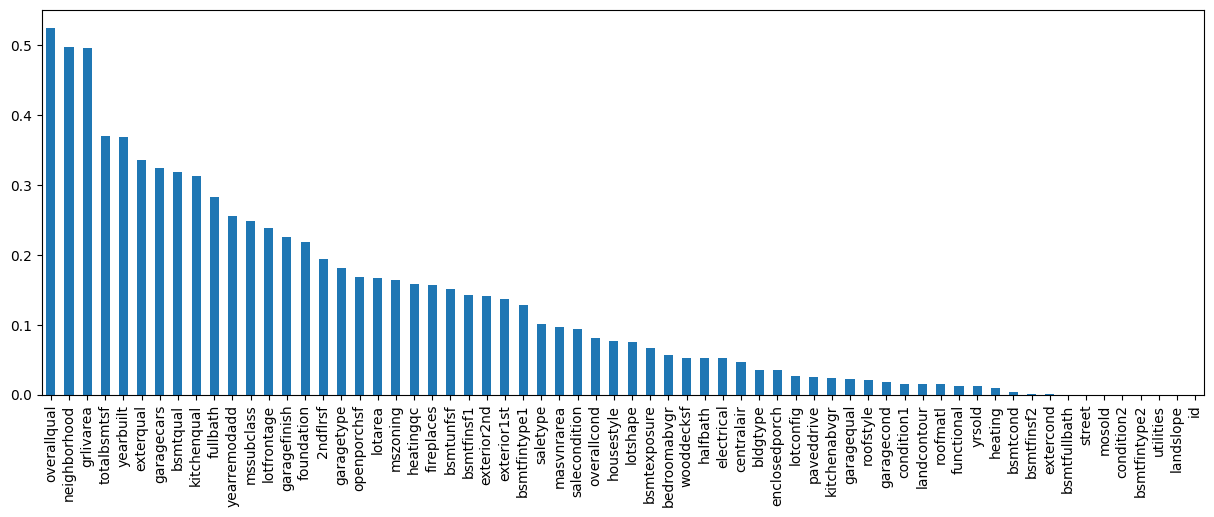

In [21]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [22]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=55)## Selecting the top 70 percentile
selected_top_columns.fit(data.drop('saleprice',axis = 1),data['saleprice'])

SelectPercentile(percentile=55,
                 score_func=<function mutual_info_regression at 0x000001D684FA79C0>)

In [23]:
imp_columns =list(data.drop('saleprice',axis = 1).columns[selected_top_columns.get_support()])
print(len(imp_columns))
print(imp_columns)

35
['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'lotshape', 'neighborhood', 'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'exterior1st', 'exterior2nd', 'masvnrarea', 'exterqual', 'foundation', 'bsmtqual', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtunfsf', 'totalbsmtsf', 'heatingqc', '2ndflrsf', 'grlivarea', 'fullbath', 'halfbath', 'kitchenqual', 'fireplaces', 'garagetype', 'garagefinish', 'garagecars', 'openporchsf', 'saletype', 'salecondition']


In [24]:
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF',
                     'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
                     'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF',
                     '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath',
                     'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea',
                     'YrSold', 'OverallCond', 'EnclosedPorch', 'KitchenAbvGr',
                     'MSSubClass', 'Heating', 'BldgType', 'Foundation', 'CentralAir',
                     'Functional', 'BsmtExposure', 'BsmtCond', 'ExterCond', 'SalePrice']

In [25]:
x_train = data[imp_columns]
y_train = data['saleprice']
x_train.shape

(934, 35)

In [48]:
test_data = pd.read_csv('test.csv')

In [49]:
col_names = [ col.strip().lower().replace(' ', '_').replace('-', '_') for col in test_data.columns ]
test_data.columns = col_names
test_data['lotfrontage'] = test_data['lotfrontage'].fillna(np.mean(test_data['lotfrontage']))
for i in test_data.select_dtypes(include = 'object'):
    ordinal_label = {k: j for j, k in enumerate(test_data.select_dtypes(include = 'object')[i].unique(), 0)}
    test_data[i] = test_data[i].map(ordinal_label)

In [50]:
test_data.dropna(inplace=True)

In [51]:
x_test = test_data[imp_columns]
y_test = test_data['saleprice']

In [52]:
d = [x_train,y_train,x_test,y_test]
for i in d:
    print(i.shape)

(934, 35)
(934,)
(410, 35)
(410,)


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [58]:
X_train = x_train
Y_train = y_train
X_test = x_test
Y_test= y_test

In [60]:
print("Mean Squared Error on Test Data for linear regression:", mse)
print("Best Hyperparameters for linear regression:", best_params)

Mean Squared Error on Test Data for linear regression: 1293895173.1816843
Best Hyperparameters for linear regression: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [62]:
reg = LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [63]:
scale_1 = StandardScaler()
scale_2 = StandardScaler()

In [64]:
X_train = scale_1.fit_transform(X_train)
y_train = scale_2.fit_transform(y_train.values.reshape(-1,1))

In [65]:
X_test = scale_1.transform(X_test)
y_test = scale_2.transform(y_test.values.reshape(-1,1))

In [66]:
reg.fit(X_train,y_train)

LinearRegression()

In [67]:
y_preds= reg.predict(X_test)

In [68]:
y_preds = scale_2.inverse_transform(y_preds)
y_test =scale_2.inverse_transform(y_test)

In [76]:
print('RMSE value of the model is ',mean_squared_error(y_test, y_preds, squared=False))

RMSE value of the model is  35970.75441496369


In [78]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error

In [79]:
print('MAPE value of the model is ',mean_absolute_percentage_error(y_test, y_preds))
print('RMSE value of the model is ',mean_squared_error(y_test, y_preds, squared=False))
print('R2 score value of the model is ',r2_score(y_test, y_preds))

MAPE value of the model is  0.14640666657966903
RMSE value of the model is  35970.75441496369
R2 score value of the model is  0.7713146414719324


In [82]:
def outliers_data(data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    iqr = Q3 - Q1

    lb = Q1 - (1.5*iqr)
    ub = Q3 + (1.5*iqr)
    outliers = (data[((data[col]<lb) | (data[col]>ub))][col])
    outliers_length =len(outliers)
    print('outlier_length:',outlier_length)
    print('outliers:',outliers)
    
  

In [95]:
train_data.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

### Preprocessing in a single function for test function

In [160]:
def preprocess_data(data, train=True, encoder=None, scaler=None, feature_selector=None):
    columns_to_drop = data.columns[data.isnull().mean() > 0.5]
    data = data.drop(columns=columns_to_drop)
    num_imputer = SimpleImputer(strategy='median')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = data.select_dtypes(include=['object']).columns
    data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])
    data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

    # One-hot encoding
    if train:
        encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
        encoded_data = encoder.fit_transform(data[categorical_cols])
    else:
        encoded_data = encoder.transform(data[categorical_cols])

    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
    data = pd.concat([data.drop(columns=categorical_cols), encoded_df], axis=1)

    # Scaling
    if train:
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data)
    else:
        scaled_data = scaler.transform(data)

    # Feature selection
    if train:
        feature_selector = SelectKBest(f_classif, k=35)
        selected_data = feature_selector.fit_transform(scaled_data, y)
    else:
        selected_data = feature_selector.transform(scaled_data)

    return selected_data, encoder, scaler, feature_selector

# train data
train_processed, encoder, scaler, feature_selector = preprocess_data(train_data, train=True)
print(train_processed.shape)
# test data
test_processed, _, _, _ = preprocess_data(test_data, train=False, encoder=encoder, scaler=scaler, feature_selector=feature_selector)
print(test_processed.shape)

C:\Users\samee\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 34  38  54  58  65  87  95  96  99 121 124 126 129 135 140 146 151 162
 187 199 209 225 246] are constant.
  warnings.warn("Features %s are constant." % constant_f

(438, 35)

### Subgrouping and classification for predicting the group for a test datapoint

In [198]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Apply KMeans Clustering to create subgroups in the training data
k = 3  # Number of subgroups
kmeans = KMeans(n_clusters=k, random_state=42)
train_subgroups = kmeans.fit_predict(train_processed)

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_processed, train_subgroups)

# Best model from grid search
best_classifier = grid_search.best_estimator_

# Predict subgroups for the reduced test data
test_predicted_subgroups = best_classifier.predict(test_processed)

# Checking the distribution of data in subgroups in the training data
subgroup_distribution = pd.Series(train_subgroups).value_counts()
print(subgroup_distribution)

# Outputting a few predicted subgroups for the test data
print("First few predicted subgroups for test data:", test_predicted_subgroups[:10])

subgroup_distribution_2 = pd.Series(test_predicted_subgroups).value_counts()
print(subgroup_distribution_2)

C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


1    634
2    330
0     58
Name: count, dtype: int64
First few predicted subgroups for test data: [1 2 1 1 1 2 1 2 1 1]
1    290
2    131
0     17
Name: count, dtype: int64


### Regression Model implimentation - LR,Ridge, Random Forest and SVR

In [170]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
mse_avg = []
# Function to find the best model using GridSearchCV
def find_best_model(X, y, model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    return grid_search.best_estimator_

# Define the parameter grids for each model
param_grids = {
    "Linear Regression": {'fit_intercept': [True, False]},
    "Ridge": {'alpha': [0.1, 1, 10]},
    "Random Forest": {'n_estimators': [100, 200], 'max_depth': [5, 10]},
    "SVR": {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
}

# Train and validate models for each subgroup
group_models = {}
for group in range(k):
    group_data = train_processed[train_subgroups == group]
    group_target = train_data['SalePrice'][train_subgroups == group]

    best_models = {}
    for model_name, model_params in param_grids.items():
        model = {
            'Linear Regression': LinearRegression(),
            'Ridge': Ridge(),
            'Random Forest': RandomForestRegressor(),
            'SVR': SVR()
        }[model_name]
        best_model = find_best_model(group_data, group_target, model, model_params)
        best_models[model_name] = best_model

    # Stacking method for final model in each subgroup
    estimators = [(name, model) for name, model in best_models.items()]
    stack_reg = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())
    stack_reg.fit(group_data, group_target)
    group_models[group] = stack_reg

# final model for each subgroup using MSE
for group in range(k):
    group_data = train_processed[train_subgroups == group]
    group_target = train_data['SalePrice'][train_subgroups == group]
    predicted = group_models[group].predict(group_data)
    mse = mean_squared_error(group_target, predicted)
    mse_avg.append(mse)
    print(f"MSE for Group {group}: {mse}")


MSE for Group 0: 97818351.73267063
MSE for Group 1: 112597.77499574132
MSE for Group 2: 768463.1488796958


### Average MSE value

In [174]:
np.mean(mse_avg)

32899804.21884869

### Improving MSE value using Random forest, Gradient Boost and XGB Regressor

In [195]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Function to find the best model using GridSearchCV
def find_best_model(X, y, model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    return grid_search.best_estimator_, -grid_search.best_score_

# parameter grids for each model
param_grids = {
    "Random Forest": {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
    "XGBRegressor": {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.05, 0.1]}
}

# Initialize dictionary to store performance metrics for each model
model_performance = {model_name: [] for model_name in param_grids}

# Train and validate models for each subgroup
for model_name, model_params in param_grids.items():
    for group in range(k):
        group_data = train_processed[train_subgroups == group]
        group_target = train_data['SalePrice'][train_subgroups == group]

        model = {
            'Random Forest': RandomForestRegressor(),
            'Gradient Boosting': GradientBoostingRegressor(),
            'XGBRegressor': XGBRegressor()
        }[model_name]
        model, _ = find_best_model(group_data, group_target, model, model_params)

        predicted = model.predict(group_data)
        mse = mean_squared_error(group_target, predicted)
        r2 = r2_score(group_target, predicted)
        mape = mean_absolute_percentage_error(group_target, predicted)

        model_performance[model_name].append((group, mse, r2, mape))

# performance for each model
for model_name, performance in model_performance.items():
    print(f"Model: {model_name}")
    for group, mse, r2, mape in performance:
        print(f"  Group {group}: MSE: {mse}, R2: {r2}, MAPE: {mape}")
    avg_mse = np.mean([mse for _, mse, _, _ in performance])
    print(f"Average MSE for {model_name}: {avg_mse}\n")

# best-performing model
best_avg_mse = min([np.mean([mse for _, mse, _, _ in performance]) for performance in model_performance.values()])
best_model_name = [model_name for model_name, performance in model_performance.items() 
                   if np.mean([mse for _, mse, _, _ in performance]) == best_avg_mse][0]

print(f"The best-performing model overall is {best_model_name} with an average MSE of {best_avg_mse}.")


Model: Random Forest
  Group 0: MSE: 87760912.20653531, R2: 0.9936455584156629, MAPE: 0.013272133120136798
  Group 1: MSE: 132180.355065694, R2: 0.999909481200919, MAPE: 0.000884781190770835
  Group 2: MSE: 1042358.5315331412, R2: 0.9996494874321803, MAPE: 0.0009827307919162206
Average MSE for Random Forest: 29645150.364378046

Model: Gradient Boosting
  Group 0: MSE: 1386.2393882185256, R2: 0.9999998996275563, MAPE: 6.428856385624887e-05
  Group 1: MSE: 6199.755609708676, R2: 0.9999957543280005, MAPE: 0.0003773977773399077
  Group 2: MSE: 22056.68011424603, R2: 0.9999925830284393, MAPE: 0.0004989552621241099
Average MSE for Gradient Boosting: 9880.891704057745

Model: XGBRegressor
  Group 0: MSE: 71111.72274464574, R2: 0.9999948510643659, MAPE: 0.00025829758639394045
  Group 1: MSE: 138093.83341727272, R2: 0.9999054315752502, MAPE: 0.0016746796673866942
  Group 2: MSE: 36131.50983646277, R2: 0.9999878501034828, MAPE: 0.0006358826746792291
Average MSE for XGBRegressor: 81779.0219994604

### The best performed algorithm is Gradent Boost Algorithm with MSE value for the model is 9881, with 99% accuracy. 

#### The project is done by sameer shaik, Sri Ram Degala, Ganesh chitlapally #Project Team 7